# Getting the Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Importing EURUSD data from csv file into a dataframe df
df = pd.read_csv('eurusd.csv', parse_dates = ['Date'], index_col = 'Date')

In [3]:
df.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


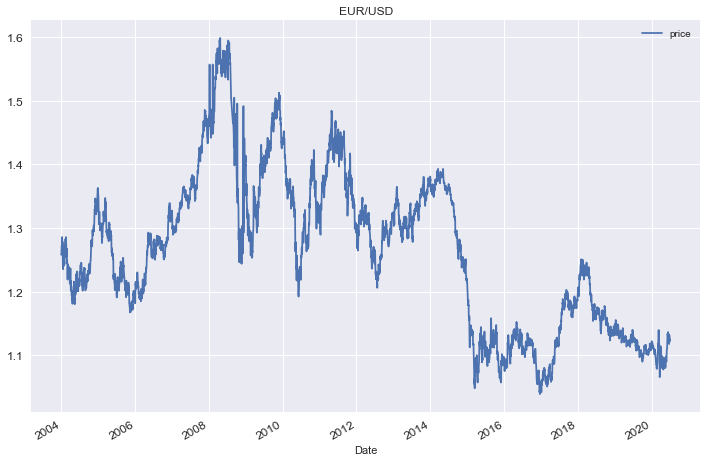

In [5]:
# Plotting EURUSD price
df.plot(figsize = (12,8), fontsize = 12, title = 'EUR/USD')
plt.show()

In [6]:
# calculating log returns
df['returns'] = np.log(df.div(df.shift(1)))

In [7]:
df.head()

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315


# A Simple Buy and Hold Strategy
It is a passive strategy

In [8]:
# Removing empty rows
df.dropna(inplace = True)

In [9]:
df.head()

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547


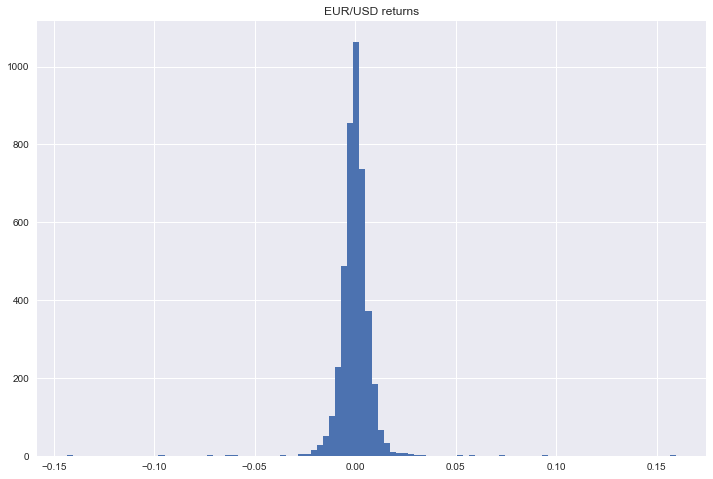

In [10]:
# Plotting a histogram of returns
df.returns.hist(bins = 100, figsize = (12,8))
plt.title('EUR/USD returns')
plt.show()

In [11]:
# Summing the returns over the holding period
df.returns.sum()

-0.11214302770699758

In [12]:
# Calculating ending value of $1 at period
np.exp(df.returns.sum())

0.8939163935445148

In [13]:
# Verifying our calculation of value of $1 at end of period
df.price[-1] / df.price[0]

0.8939163935445141

In [14]:
# Calculating value of our investment over time
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [15]:
# Adding a cumulative returns column to the dataframe creturns
df['creturns'] = df.returns.cumsum().apply(np.exp)

In [16]:
df.head()

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343


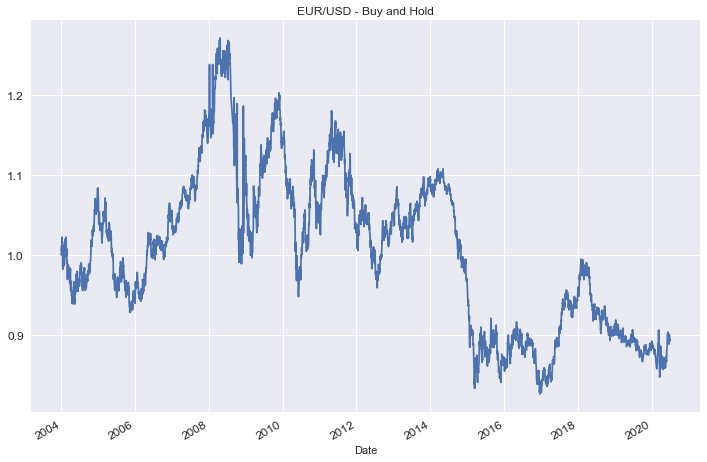

In [17]:
# Plotting cumulative returns
df.creturns.plot(figsize = (12,8), title = 'EUR/USD - Buy and Hold', fontsize = 12)
plt.show()

In [18]:
# The plot is similar to our initial price chart. The only difference is that this one is normalised

# Performance Metrics
for Buy and Hold strategy

In [19]:
df.head()

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343


In [20]:
# Calculating absolute performance over time
df.creturns.iloc[-1]

0.8939163935445149

In [21]:
# Alternatively we can also calculate the cumulative returns over time for absolute performance
df.returns.sum()

-0.11214302770699758

In [22]:
# Getting descriptive statistics
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


Annualised mean return and risk

In [23]:
# Calculating annualised mean return
df.returns.mean() * 252

-0.0066120830561917105

In [24]:
# calculating annualised risk
df.returns.std() * np.sqrt(252)

0.12054120479431393

In [25]:
# In finance typically returns have fat tails, and mean returns and variance do not capture the risks

# Maximum Drawdown
is a very popular metric for extreme negative scenarios. It is essentially a measure of tail risk. Max Drawdown looks for the greatest movement from a high point to a low point. The higher the maximum drawdown, the higher the risk

In [26]:
df.head()

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343


In [27]:
# Using a helper column calculate cumulative maximum return over time.
df ['cummax'] = df.creturns.cummax()

In [28]:
df.head()

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343


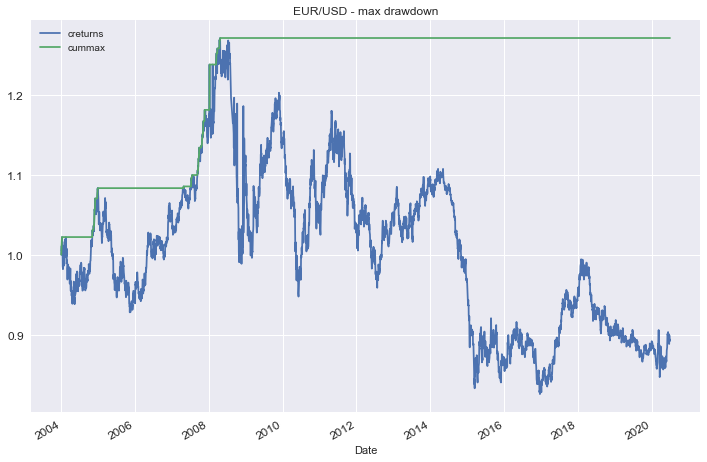

In [29]:
# plotting the cumulative maximum return
df[['creturns','cummax']].dropna().plot(figsize = (12,8), title = 'EUR/USD - max drawdown', fontsize = 12)
plt.show()

In [30]:
# This plot has essentially market the highest peaks of EURUSD pair during our period of consideration

In [31]:
# Calculating the distance between cumulative maximum and creturns, and the maximum of this distance is the max drawdown
drawdown = df['cummax'] - df['creturns']
drawdown.head()

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
dtype: float64

In [32]:
# Maximum drawdown. It is the percentage points we lose
drawdown.max()

0.4448840569933439

In [33]:
# To get the timestamp/day of the maximum drawdown use idxmax method. idxmax gives out the index label
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

# SMA Crossover Strategies
1. SMA are one of the most oldest and most watched metrics and have a deep impact on investor psychology. 
2. They can be profitable if not on a standalone basis, then as a part of the larger strategy
3. SMA filter out market noise and smoothen fluctuations in price
4. They are a good tool for identifying trend momentum
5. 3 types of moving averages: Simple Moving Averages (SMA), Weighted Moving Averages (WMA), Exponential Moving Averages (EMA)
6. WMA and EMA put more emphasis on recent price changes

# Defining an SMA Crossover Strategy

In [34]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [35]:
# reading daily price data of EURUSD pair from the csv file
data = pd.read_csv('eurusd.csv', parse_dates = ['Date'], index_col = 'Date')

In [36]:
data.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [37]:
# defining our moving averages. we take 50 and 200 periods
sma_s = 46
sma_l = 137

In [38]:
# defining a rolling window, and chaining it to the mean method to calculate rolling average/mean
# for the first 49 days we have missing values 
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [39]:
# Creating two new columns for our rolling mean prices
data['SMA_S'] = data.price.rolling(sma_s).mean()
data['SMA_L'] = data.price.rolling(sma_l).mean()
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.103047,1.102654
2020-06-25,1.125087,1.103905,1.102737
2020-06-26,1.122208,1.104801,1.102788


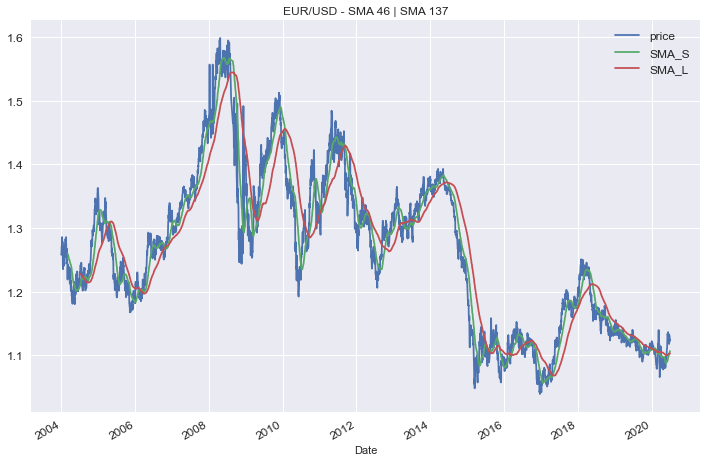

In [40]:
# plotting prices and moving averages
data.plot(figsize = (12,8), title = 'EUR/USD - SMA {} | SMA {}'.format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [41]:
# Dropping the missing values from dataframe
data.dropna(inplace = True)
data.head()

,price,SMA_S,SMA_L
Date,,,
2004-07-09,1.241897,1.212185,1.227891
2004-07-12,1.240803,1.213333,1.227764
2004-07-13,1.233304,1.214392,1.227583
2004-07-14,1.238497,1.215486,1.227362
2004-07-15,1.235605,1.216466,1.227096


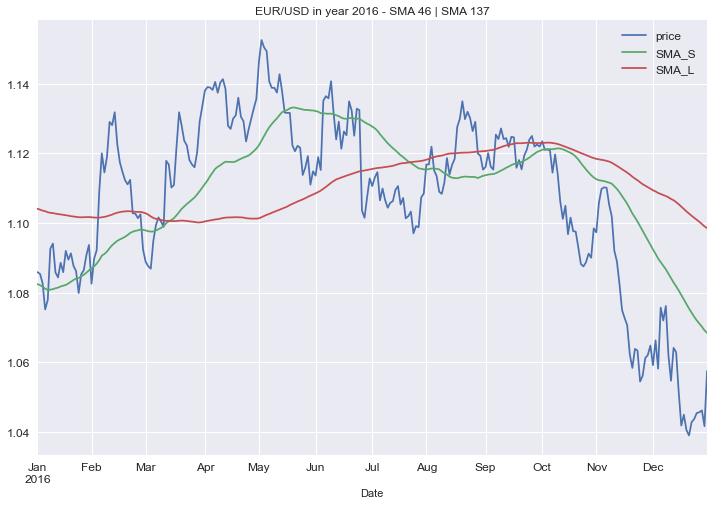

In [42]:
# Plotting for year 2016 to get a zoomed in view
data.loc['2016'].plot(figsize = (12,8), title = 'EUR/USD in year 2016 - SMA {} | SMA {}'.format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [43]:
# Creating an additional column position: -1 for short position and +1 for long position
data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
data.head()

,price,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1


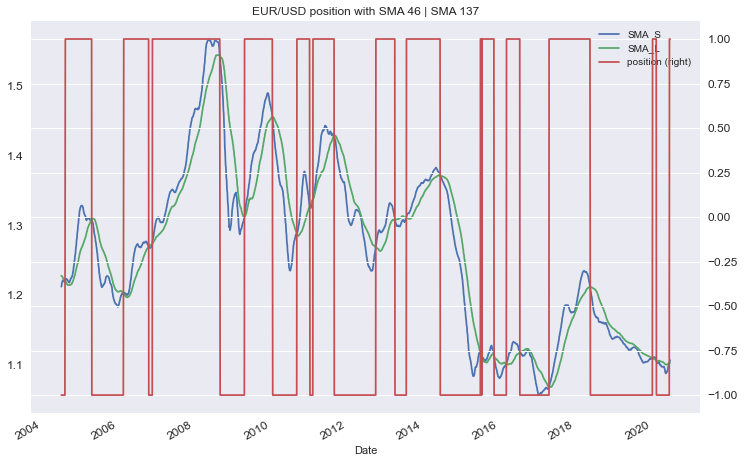

In [44]:
# Plotting our positions along with moving averages
data.loc[:, ['SMA_S', 'SMA_L', 'position']].plot(figsize = (12,8), fontsize = 12, secondary_y = 'position',
                                                title = 'EUR/USD position with SMA {} | SMA {}'.format(sma_s, sma_l))
plt.show()

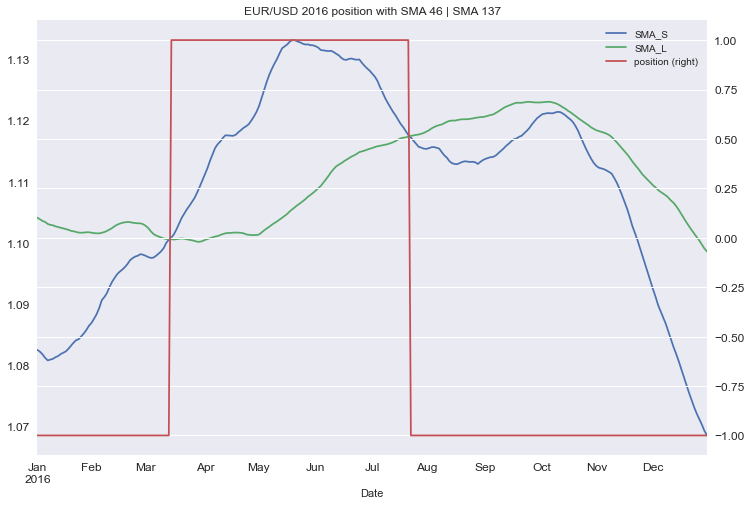

In [45]:
# PLotting our positions for year 2016 to get a zoomed in view
data.loc['2016', ['SMA_S', 'SMA_L','position']].plot(figsize = (12,8), fontsize = 12, secondary_y = 'position', 
                                    title = 'EUR/USD 2016 position with SMA {} | SMA {}'.format(sma_s, sma_l))
plt.show()

# Vectorised Strategy Backtesting
It is called Vectorised Backtesting because we used pandas to create -1 and +1 positions, and backtested using those without any iterations or for loops. It keeps things simple and speeds up our code's performance. But it also has its pitfalls

In [46]:
data.head()

,price,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1


In [47]:
# Adding the columns daily log returns (buy and hold returns) and strategy returns to our dataframe
# The strategy returns are calculated based on the position of previous day. so we need to shift one place down

data['returns'] = np.log(data.price.div(data.price.shift(1)))
data['strategy'] = data.position.shift(1) * data['returns']

data.dropna(inplace = True) # removing the empty rows
data.head()

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338
2004-07-16,1.245594,1.217883,1.226961,-1,0.008051,-0.008051


In [48]:
# Comparing the absolute performance of returns and our strategy
data[['returns', 'strategy']].sum()

returns    -0.099105
strategy    0.926912
dtype: float64

In [49]:
# Comparing the value of $1 invested over time using np.exp
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.905647
strategy    2.526694
dtype: float64

In [50]:
# It turns out that our strategy is better than buy and hold

In [51]:
# Comparing annualised return
data[['returns', 'strategy']].mean() * 252

returns    -0.006035
strategy    0.056448
dtype: float64

In [52]:
# Comparing annualised risk
data[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.120418
strategy    0.120366
dtype: float64

In [53]:
# Since our strategy has only long and short positions, and no neutral positions, the risk is same as buy and hold

In [54]:
# Adding columns for cumulative returns of buy and hold and cumulative returns of our SMA crossover strategy
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
data.tail()

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.910893,2.541328
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.905943,2.527519
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.903625,2.521051
2020-06-29,1.122586,1.105777,1.102869,1,0.000337,0.000337,0.903929,2.521901
2020-06-30,1.124720,1.106698,1.102957,1,0.001899,0.001899,0.905647,2.526694


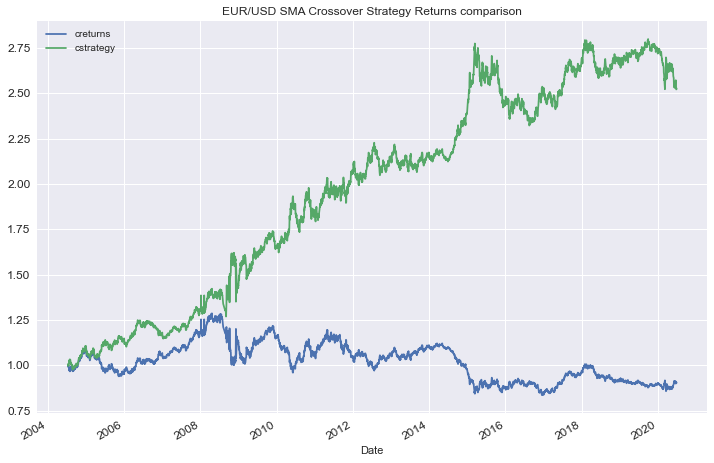

In [55]:
# Plotting returns for buy and hold and our strategy
data[['creturns', 'cstrategy']].plot(figsize = (12,8),fontsize = 12, 
                                     title = 'EUR/USD SMA Crossover Strategy Returns comparison')
plt.show()

As we can observe, in choppy markets our strategy is only marginally better than buy and hold. But in strongly trending market conditions, momentum trading strategies such as SMA crossover strategies outperform buy and hold. Also we have not incorporated in our strategy trading costs, which will eat up a portion of our returns

In [56]:
# Calculating outperformance of our strategy
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

1.6210467811232663

THUMB RULE: We should not follow any strategy which does not outperform benchmark forecast, the benchmark being buy and hold

# Finding the Optimal SMA Strategy
1. We notice that the bulk of our strategy's outperformance occurred in the year 2015. 
2. Other than that this SMA50-SMA200 Crossover strategy was not very effective. 
3. There might be other SMA crossover pairs which could deliver a much better performance than 50-200 period crossover. 
4. We need to find them
5. NOTE: The code was rerun using 46, 137 SMA crossover pair, to check the metrics. 46, 137 was found to be the best performing pair through computations described below

In [57]:
# importing the raw data from csv
df = pd.read_csv('eurusd.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [58]:
# Creating a user-defined function test_strategy to pass various SMA periods and compare performance of crossover SMAs
def test_strategy(SMA):
    data = df.copy()
    data['returns'] = np.log(data.price.div(data.price.shift(1)))
    data['SMA_S'] = data.price.rolling(int(SMA[0])).mean()
    data['SMA_L'] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
    data['strategy'] = data.position.shift(1) * data['returns']
    data.dropna(inplace = True)
    
    return np.exp(data['strategy'].sum())

In [59]:
# Passing a tuple of moving averages here 50 and 200 through our test_strategy function to check returns
test_strategy((50, 200))

1.2835003323288487

In [60]:
test_strategy((75, 150))

1.58974017632631

In [61]:
# already we have a better pair of moving averages in 75, 150 for our SMA crossover strategy than 50,200 pair

In [62]:
test_strategy((25, 252))

1.1755957408242586

In [63]:
# Defining ranges for SMA_S and SMA_L to test performance
SMA_S_range = range(10, 50, 1) # between 10 and 50 excluding, with a step of 1
SMA_L_range = range(100, 252, 1) # Since there are 252 days in a year
SMA_S_range

range(10, 50)

In [64]:
# We aim to create all possible combinations. It could be done with a nested for loop, but there is also a tool in python
# for cartesian product of input iterables
from itertools import product

In [65]:
# Adding to dataframe under combinations variable, the possible combinations of SMA_S and SMA_L in our range, using product
combinations = list (product(SMA_S_range, SMA_L_range))

In [66]:
# Number of combinations which is simply equal to (50-10) * (252-100)
len(combinations)

6080

In [67]:
# Now we can iterate over all combinations
results = [] # We create an empty list
for comb in combinations:
    results.append(test_strategy(comb)) # passing the tuple through test strategy and appending the results to a new list

In [68]:
# Finding the maximum value in our result list. This would be best performing SMA pair for Crossover strategy 
np.max(results)

2.5266939897810787

In [69]:
# Finding out which index position in the result list gave out this best performance
np.argmax(results)

5509

In [70]:
# Finding out the Moving average pair which gave this maximum perfomance
combinations[np.argmax(results)]

(46, 137)

So we find that if we had chosen SMA_S as 46 and SMA_L as 137, we would have gained the highest returns in a SMA Crossover strategy

In [71]:
# Storing our combinations and their corresponding performance in a dataframe
many_results = pd.DataFrame(data = combinations, columns = ['SMA_S', 'SMA_L'])
many_results['performance'] = results
many_results.head()

,SMA_S,SMA_L,performance
0,10,100,0.919640
1,10,101,0.901791
2,10,102,0.908851
3,10,103,0.917204
4,10,104,0.990232


In [72]:
# Listing out the best 10 performing SMA pairs in our many_results dataframe
many_results.nlargest(10, 'performance')

,SMA_S,SMA_L,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


In [73]:
# Listing out the worst 10 performing SMA pairs in our many_results dataframe
many_results.nsmallest(10, 'performance')

,SMA_S,SMA_L,performance
461,13,105,0.835621
310,12,106,0.837311
309,12,105,0.846303
159,11,107,0.849825
307,12,103,0.851647
308,12,104,0.852194
608,14,100,0.865872
306,12,102,0.871889
462,13,106,0.876600
458,13,102,0.876784


# Some Limitations of Backtesting
1. Whenever a strategy is not based on past data or not optimised to past data, then back testing is appropriate.
2. But in this case we sort of fitted our strategy to past data in a way that the strategy is optimised on the past data.
3. Since our algorithm is fitted to the underlying data, there is no guarantee that strategy 46, 137 would be the best strategy in future as well
4. If a strategy is optimised or fitted to past data then we should test the quality of that strategy on new/fresh/future data that our algorithm has not seen before.
5. This is called Forward Testing or outsample testing

In [74]:
# Let us take this SMA pair and check performance metrics and plot by changing values In [41]